# Comparison G

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
file_name = "fo_2compared.tab"
df = pd.read_csv(file_name, delimiter='\s+',skiprows = 12)
df.head()

,T(K),P(bar),g(J/mol),h(J/mol),log10[Keq],s(J/mol/K),cp(J/mol/K),v(J/mol/bar),alpha(1/K),beta(1/bar),...,v0(km/s),v0T(km/s/K),v0P(km/s/bar),vp(km/s),vpT(km/s/K),vpP(km/s/bar),vs(km/s),vsT(km/s/K),vsP(km/s/bar),cp/cv
0,298.15,1.0,-2053138.0,-2024784.0,359.6964,95.1000,118.6714,4.365778,0.000113,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348.15,1.0,-2058379.0,-2018590.0,308.8244,114.2859,128.6338,4.371710,0.000124,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,398.15,1.0,-2064543.0,-2011957.0,270.8507,132.0762,136.3840,4.378160,0.000133,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,448.15,1.0,-2071565.0,-2004976.0,241.4504,148.5855,142.6429,4.385033,0.000141,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,498.15,1.0,-2079383.0,-1997710.0,218.0354,163.9513,147.8404,4.392261,0.000148,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
fo = {'G0' :-2053138, 
      'S0' : 95.1, 
      'V0' : 4.366, 
      'c_1': 233.3, 'c_2':.1494E-2, 'c_3':-603800, 'c_5':-1869.7, 
      'b_1':.613E-4,'b_5':-.613E-3, 'b_6':1250000, 'b_7':-109.5,
     }

In [58]:
def g(T,P,phase):
    T_r = 298.15
    return (
    phase.get('G0')                    + 
    phase.get('S0')*(T_r - T)          +

    2*np.sqrt(T)*phase.get('c_5')      - 2*np.sqrt(T_r)*phase.get('c_5') +
    T**2*phase.get('c_2')/2            - T_r**2*phase.get('c_2')/2       +
    T*phase.get('c_1')                 - T_r*phase.get('c_1')            +
    phase.get('c_3')/T_r               - phase.get('c_3')/T              - 
    
    T*(T*phase.get('c_2')              - T_r*phase.get('c_2')            + 
       phase.get('c_1')*np.log(T)      - phase.get('c_1')*np.log(T_r)    + 
       phase.get('c_3')/(2*T_r**2)     - phase.get('c_3')/(2*T**2)       + 
       2*phase.get('c_5')/np.sqrt(T_r) - 2*phase.get('c_5')/np.sqrt(T))  +
    
    phase.get('V0')                                                 *
    (phase.get('b_6') + phase.get('b_7')*(T - T_r))**0.25           *
    ((4*P + phase.get('b_6') + phase.get('b_7')*(T - T_r))**0.75 - 
     (4   + phase.get('b_6') + phase.get('b_7')*(T - T_r))**0.75)   *
    (2.0*T**0.5*phase.get('b_5') - 2.0*T_r**0.5*phase.get('b_5')    + 
     T*phase.get('b_1')          - T_r*phase.get('b_1') + 1.0)/3
    )


In [59]:
mydf = pd.DataFrame()

In [60]:
mydf['T(K)'] = df['T(K)']
mydf['P(bar)'] = df['P(bar)']
mydf['g(J/mol)'] = df['g(J/mol)']

In [61]:
mydf['my_g(J/mol)'] = g(df['T(K)'],df['P(bar)'],fo)
mydf['error'] = mydf['g(J/mol)'] - mydf['my_g(J/mol)']

In [62]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

<Axes: xlabel='g(J/mol)', ylabel='error'>

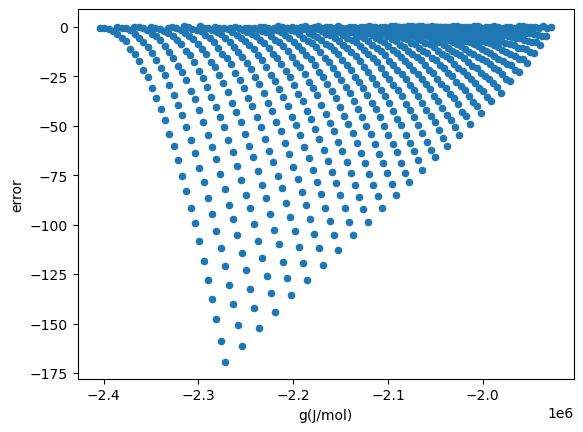

In [63]:
mydf.plot.scatter(x='g(J/mol)', y='error')

<Axes: xlabel='T(K)', ylabel='error'>

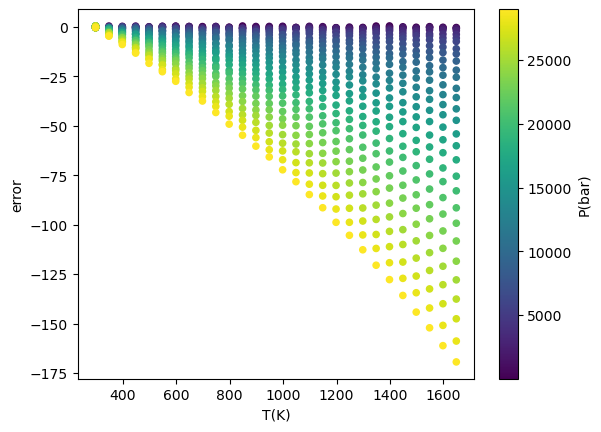

In [64]:
mydf.plot.scatter(x='T(K)', y='error', c='P(bar)')

In [65]:
file_name = "fo_no_taylor.tab"
df2 = pd.read_csv(file_name, delimiter='\s+',skiprows = 12)
df2.head()

,T(K),P(bar),g(J/mol),h(J/mol),log10[Keq],s(J/mol/K),cp(J/mol/K),v(J/mol/bar),alpha(1/K),beta(1/bar),...,v0(km/s),v0T(km/s/K),v0P(km/s/bar),vp(km/s),vpT(km/s/K),vpP(km/s/bar),vs(km/s),vsT(km/s/K),vsP(km/s/bar),cp/cv
0,298.1,1.0,-2053138.0,-2024784.0,359.7,95.1,118.7,4.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348.1,1.0,-2058379.0,-2018590.0,308.8,114.3,128.6,4.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,398.1,1.0,-2064543.0,-2011957.0,270.9,132.1,136.4,4.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,448.1,1.0,-2071565.0,-2004976.0,241.5,148.6,142.6,4.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,498.1,1.0,-2079383.0,-1997710.0,218.0,164.0,147.8,4.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
mydf2 = pd.DataFrame()
mydf2['T(K)'] = df2['T(K)']
mydf2['P(bar)'] = df2['P(bar)']
mydf2['g(J/mol)'] = df2['g(J/mol)']
mydf2['my_g(J/mol)'] = g(df2['T(K)'],df2['P(bar)'],fo)
mydf2['error'] = mydf2['g(J/mol)'] - mydf2['my_g(J/mol)']

In [67]:
mydf2

,T(K),P(bar),g(J/mol),my_g(J/mol),error
0,298.1,1.0,-2053138.0,-2053138.0,-0.0
1,348.1,1.0,-2058379.0,-2058378.6,-0.4
2,398.1,1.0,-2064543.0,-2064543.3,0.3
3,448.1,1.0,-2071565.0,-2071564.9,-0.1
4,498.1,1.0,-2079383.0,-2079382.8,-0.2
...,...,...,...,...,...
835,1448.2,29001.0,-2201804.0,-2201796.2,-7.8
836,1498.2,29001.0,-2218881.0,-2218878.8,-2.2
837,1548.2,29001.0,-2236268.0,-2236271.8,3.8
838,1598.2,29001.0,-2253957.0,-2253966.8,9.8


<Axes: xlabel='T(K)', ylabel='error'>

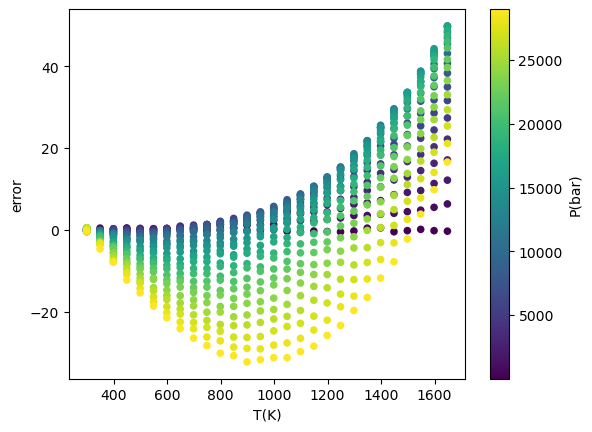

In [68]:
mydf2.plot.scatter(x='T(K)', y='error', c='P(bar)')

In [69]:
T = np.linspace(298,  1573,  10)
P = np.linspace(1  , 10000, 100)
X, Y = np.meshgrid(T, P)
G = g(X, Y, fo)

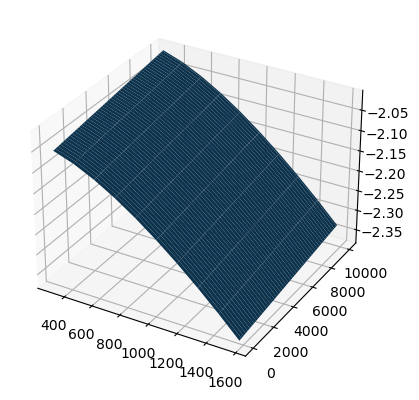

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, G)
plt.show()